## RNN (비행기 탑승객 예측 데이터)

In [ ]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/산기협_교육/Data/international-airline-passengers.csv', usecols=[1], skipfooter=3)
data = dataset.values.reshape(-1,1)

print(data)

[[112]
 [118]
 [132]
 [129]
 [121]
 [135]
 [148]
 [148]
 [136]
 [119]
 [104]
 [118]
 [115]
 [126]
 [141]
 [135]
 [125]
 [149]
 [170]
 [170]
 [158]
 [133]
 [114]
 [140]
 [145]
 [150]
 [178]
 [163]
 [172]
 [178]
 [199]
 [199]
 [184]
 [162]
 [146]
 [166]
 [171]
 [180]
 [193]
 [181]
 [183]
 [218]
 [230]
 [242]
 [209]
 [191]
 [172]
 [194]
 [196]
 [196]
 [236]
 [235]
 [229]
 [243]
 [264]
 [272]
 [237]
 [211]
 [180]
 [201]
 [204]
 [188]
 [235]
 [227]
 [234]
 [264]
 [302]
 [293]
 [259]
 [229]
 [203]
 [229]
 [242]
 [233]
 [267]
 [269]
 [270]
 [315]
 [364]
 [347]
 [312]
 [274]
 [237]
 [278]
 [284]
 [277]
 [317]
 [313]
 [318]
 [374]
 [413]
 [405]
 [355]
 [306]
 [271]
 [306]
 [315]
 [301]
 [356]
 [348]
 [355]
 [422]
 [465]
 [467]
 [404]
 [347]
 [305]
 [336]
 [340]
 [318]
 [362]
 [348]
 [363]
 [435]
 [491]
 [505]
 [404]
 [359]
 [310]
 [337]
 [360]
 [342]
 [406]
 [396]
 [420]
 [472]
 [548]
 [559]
 [463]
 [407]
 [362]
 [405]
 [417]
 [391]
 [419]
 [461]
 [472]
 [535]
 [622]
 [606]
 [508]
 [461]
 [390]

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
from sklearn.preprocessing import normalize

data_norm = normalize(data.T, copy=True, norm='max').squeeze(0)
print(data_norm.shape)

(144,)


In [ ]:
# D=12 : 12개로 window
# y값은 x12개 이후의 것
# 윈도우 사이즈를 바꿔도돼

def get_Xy(data, D=5):
  X_l, y_l = list(), list()
  N = len(data)

  assert N > D, 'N should be larger than D, where N in len(data)'

  for ii in range(N-D):
    X_l.append(data[ii:ii+D])
    y_l.append(data[ii+D])
  X = np.array(X_l).reshape(N-D, D, 1)
  y = np.array(y_l).reshape(N-D, 1)
  return X, y

X, y = get_Xy(data_norm)
print(X.shape, y.shape)

(139, 5, 1) (139, 1)


In [ ]:
print(X[0], y[0])

[[0.18006431]
 [0.18971061]
 [0.21221865]
 [0.2073955 ]
 [0.19453376]] [0.2170418]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense

model = Sequential()
model.add(InputLayer(input_shape=X.shape[1:]))
model.add(LSTM(10, activation='relu'))
model.add(Dense(1, activation='tanh'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10)                480       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.model_selection import train_test_split

# 시계열 예측 : mean_squared_error
# 목적에 따라 loss나 matrix가 달라짐
# 시계열 데이터에서는 acc를 측정할 수 있는 효율적인 방법이 따로 없음 (맞다 아니다를 판단하기 까다로움)
# 분류처럼 어떤것이 정답일 확률을 출력하지 않아도 됨
# 딥러닝이 예측한 값과 실제 값이 얼마나 차이가 나는지만 보면 됨

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
4/4 [==============================] - 1s 77ms/step - loss: 0.1585 - val_loss: 0.1829
Epoch 2/100
4/4 [==============================] - 0s 19ms/step - loss: 0.1483 - val_loss: 0.1719
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 0.1386 - val_loss: 0.1610
Epoch 4/100
4/4 [==============================] - 0s 20ms/step - loss: 0.1287 - val_loss: 0.1504
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1191 - val_loss: 0.1400
Epoch 6/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1100 - val_loss: 0.1298
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1010 - val_loss: 0.1200
Epoch 8/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0924 - val_loss: 0.1105
Epoch 9/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0841 - val_loss: 0.1013
Epoch 10/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0762 - val_loss: 0.0926
Epoch 11/100
4/4 [=

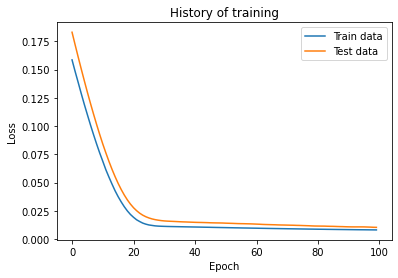

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('History of training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train data', 'Test data'], loc=0)
plt.show()

1/1 [==============================] - 0s 146ms/step


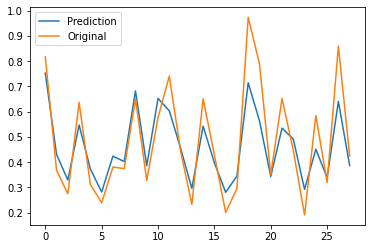

In [ ]:
yp = model.predict(X_test)
plt.plot(yp, label='Prediction')
plt.plot(y_test, label='Original')
plt.legend(loc=2)
plt.show()

1/1 [==============================] - 0s 16ms/step


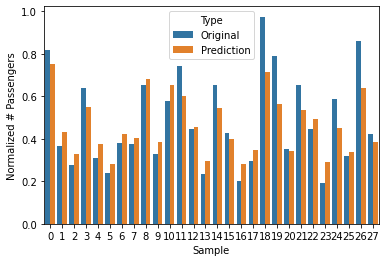

In [ ]:
yp = model.predict(X_test)
df = pd.DataFrame()
df['Sample'] = list(range(len(y_test))) * 2
df['Normalized # Passengers'] = np.concatenate([y_test, yp], axis=0)
df['Type'] = ['Original'] * len(y_test) + ['Prediction'] * len(yp)
sns.barplot(x='Sample', y='Normalized # Passengers', hue='Type', data=df)

5/5 [==============================] - 0s 3ms/step


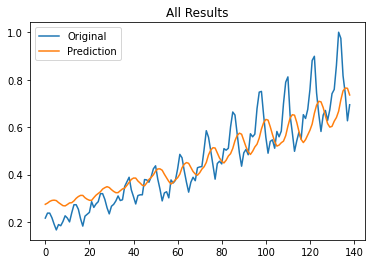

In [ ]:
yp = model.predict(X)
plt.plot(y, label='Original')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('All Results')
plt.show()